<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/2.-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

x1,x2,x3,y = np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/police.txt",skiprows=1, unpack=True, dtype=np.float64)
bias=np.ones(x1.size, dtype=np.float64)
X = np.column_stack((bias,x1, x2, x3))
Y = y.reshape(-1, 1)
print(f"Xshape={X.shape} yshape={y.shape} Yshape={Y.shape}")


Xshape=(30, 4) yshape=(30,) Yshape=(30, 1)


In [66]:
print(f"x={X.dtype} y={Y.dtype} ")

x=float64 y=float64 


In [67]:
def forward(X,w):
  return sigmoid(np.matmul(X,w))

In [68]:
def gradient(X,Y,w):
  error=forward(X,w) - Y
  return np.matmul(X.T, (error)) / X.shape[0]

In [69]:
def train(X,Y, iterations, lr):
  w=np.zeros((X.shape[1], 1), dtype=np.float64)
  for i in range(iterations):
    print(f"iteration {i} => loss {mse_loss(X,Y,w)}")
    w -= gradient(X, Y, w) * lr
  return w

In [70]:
def sigmoid(z):
  return 1/ (1 + np.exp(-z))

In [71]:
def classify(X,w):
  return np.round(forward(X,w))

In [72]:
def test(X,Y,w):
  total_examples = X.shape[0]
  correct_results = np.sum(classify(X,w) == Y)
  success_pct = correct_results * 100 / total_examples
  print(f"Success: {correct_results} {total_examples} {success_pct}")

In [73]:
def mse_loss(X,Y,w):
  return np.average((forward(X,w) - Y) ** 2)

In [74]:
def log_loss(X,Y,w):
  y_hat = forward(X,w)
  first_term = Y * np.log(y_hat)
  second_term = (1 - Y) * np.log(1 - y_hat)
  return -np.average(first_term + second_term)

In [75]:
def prepare_axes():
    ax = plt.figure().add_subplot(projection = '3d')
    ax.clear()
    ax.set_zticklabels(())
    ax.set_xlabel("w1", labelpad=15, fontsize=30)
    ax.set_ylabel("w2", labelpad=15, fontsize=30)
    ax.set_zlabel("Loss", labelpad=15, fontsize=30)
    ax.view_init(30, 120)
    return ax

In [76]:
# # Come up with some plausible data
# n_examples = 20
# np.random.seed(1234)
# X = np.random.rand(n_examples, 2)
# w = [1.23, 2.34]
# Y = np.dot(X, w)
# Y_binary = np.greater_equal(Y, np.median(Y)).astype(int)

# # Prepare plot
# MESH_SIZE = 400
# sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# # Plot mean squared error loss
# ax = prepare_axes()
# plt.title("Mean Squared Error Loss", fontsize=30)
# view_range = 100    # Wide range to see the creeks and valleys
# W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
#                      np.linspace(-view_range, view_range, MESH_SIZE))
# losses = np.array([log_loss(X, Y_binary, [w1, w2]) for w1, w2
#                    in zip(np.ravel(W1), np.ravel(W2))])
# L = losses.reshape((MESH_SIZE, MESH_SIZE))
# ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
#                 vmax=np.max(L), linewidth=0.2, antialiased=True)
# plt.ion()
# plt.show()

# # Plot logarithmic loss
# ax = prepare_axes()
# plt.title("Log Loss", fontsize=30)
# view_range = 20    # Tight range to avoid overflows
# W1, W2 = np.meshgrid(np.linspace(-view_range, view_range, MESH_SIZE),
#                      np.linspace(-view_range, view_range, MESH_SIZE))
# losses = np.array([sigmoid(X, Y_binary, [w1, w2]) for w1, w2 in
#                    zip(np.ravel(W1), np.ravel(W2))])
# L = losses.reshape((MESH_SIZE, MESH_SIZE))
# ax.plot_surface(W1, W2, L, cmap=cm.autumn, edgecolors='black',
#                 vmax=np.max(L), linewidth=0.2, antialiased=True)
# plt.show()


In [77]:
w = train(X,Y, iterations=10000, lr=0.001)
test(X,Y,w)

Streaming output truncated to the last 5000 lines.
iteration 5001 => loss 0.10815093391030217
iteration 5002 => loss 0.1081502347092195
iteration 5003 => loss 0.10814953570707778
iteration 5004 => loss 0.10814883690373148
iteration 5005 => loss 0.10814813829903554
iteration 5006 => loss 0.10814743989284485
iteration 5007 => loss 0.10814674168501447
iteration 5008 => loss 0.10814604367539973
iteration 5009 => loss 0.10814534586385562
iteration 5010 => loss 0.10814464825023795
iteration 5011 => loss 0.10814395083440217
iteration 5012 => loss 0.10814325361620399
iteration 5013 => loss 0.10814255659549933
iteration 5014 => loss 0.10814185977214417
iteration 5015 => loss 0.10814116314599458
iteration 5016 => loss 0.10814046671690689
iteration 5017 => loss 0.10813977048473745
iteration 5018 => loss 0.10813907444934276
iteration 5019 => loss 0.10813837861057947
iteration 5020 => loss 0.10813768296830441
iteration 5021 => loss 0.10813698752237441
iteration 5022 => loss 0.10813629227264664
iter

In [84]:
print(f"weights:{w.T}")
pdWeights = []
for i in range(15):
  prediction={}
  prediction["classification"] = classify(X[i], w)[0]
  prediction["label"] =Y[i][0]
  print(f"X[{i}] -> {prediction.get('classification')} (label:{prediction['label']})")
  pdWeights.append(prediction)

weights:[[-0.37450392  0.51754011 -0.35263466  0.25625742]]
X[0] -> 0.0 (label:1.0)
X[1] -> 0.0 (label:0.0)
X[2] -> 1.0 (label:1.0)
X[3] -> 1.0 (label:1.0)
X[4] -> 0.0 (label:1.0)
X[5] -> 0.0 (label:0.0)
X[6] -> 1.0 (label:1.0)
X[7] -> 1.0 (label:1.0)
X[8] -> 1.0 (label:1.0)
X[9] -> 0.0 (label:0.0)
X[10] -> 0.0 (label:0.0)
X[11] -> 1.0 (label:1.0)
X[12] -> 0.0 (label:0.0)
X[13] -> 1.0 (label:1.0)
X[14] -> 0.0 (label:0.0)


In [85]:
import pandas as pd
df = pd.DataFrame(pdWeights)
df

,classification,label
0,0.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,1.0
5,0.0,0.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [86]:
import pandas as pd
df = pd.DataFrame(w.reshape(1,4), columns=["bias", "Reservations","Temperature","Tourists"])
df

,bias,Reservations,Temperature,Tourists
0,-0.374504,0.51754,-0.352635,0.256257


<Axes: title={'center': 'Weights'}>

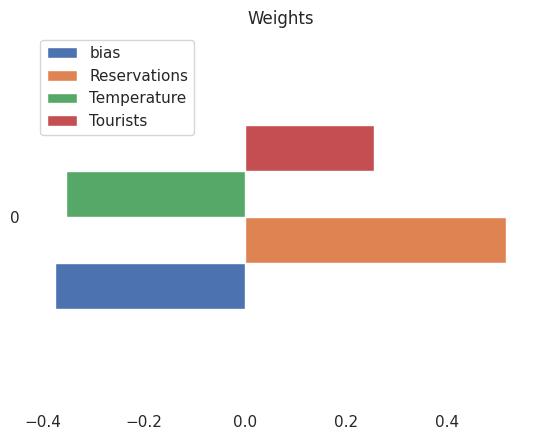

In [89]:
# prompt: plot dataframe df

df.plot.barh(title="Weights")
